# Importing

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
import numpy as np

# Pre Processing

In [152]:
data = pd.read_csv('spam_dataset.csv')

X = data['text']  # Features - the email text
y = data['label_num']  # Target variable - spam or not spam

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
x_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42)
    


# Default Model (No modified Parameters)

In [153]:
# Example of a basic logistic regression model

basic_model = LogisticRegression()
basic_model.fit(X_train, y_train)

LogisticRegression()

# Tune Model


In [154]:
# 1 min runtime

# Filter out the UserWarning related to dimension inference

warnings.filterwarnings("ignore", message="Dimension .* was inferred to .* In upcoming versions of scikit-optimize")

lr_param_space = {
    'C': np.linspace(70, 100),  # Regularization parameter
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    # 'solver': [ 'saga'],
    'penalty': ['l1', 'l2', 'none']  # Penalty term
    
}

# Exclude non-valid combinations
if 'liblinear' in lr_param_space['solver'] and 'none' in lr_param_space['penalty']:
    lr_param_space['penalty'].remove('none')

for solver in ['lbfgs', 'newton-cg']:
    if 'l1' in lr_param_space['penalty']:
        lr_param_space['penalty'].remove('l1')

# Create Logistic Regression classifier
lr = LogisticRegression(max_iter=100)

# Perform Grid Search for Logistic Regression
lr_search = GridSearchCV(
    estimator=lr,
    param_grid=lr_param_space,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
lr_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 70.        ,  70.6122449 ,  71.2244898 ,  71.83673469,
        72.44897959,  73.06122449,  73.67346939,  74.28571429,
        74.89795918,  75.51020408,  76.12244898,  76.73469388,
        77.34693878,  77.95918367,  78.57142857,  79.18367347,
        79.79591837,  80.40816327,  81.02040816,  81.63265306,
        82.24489796,  82.85714286,  83.46938776,  84...
        87.14285714,  87.75510204,  88.36734694,  88.97959184,
        89.59183673,  90.20408163,  90.81632653,  91.42857143,
        92.04081633,  92.65306122,  93.26530612,  93.87755102,
        94.48979592,  95.10204082,  95.71428571,  96.32653061,
        96.93877551,  97.55102041,  98.16326531,  98.7755102 ,
        99.3877551 , 100.        ]),
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy')

# Train and Visualize Model

Best parameters for Logistic Regression:
C: 95.7143
penalty: l2
solver: lbfgs


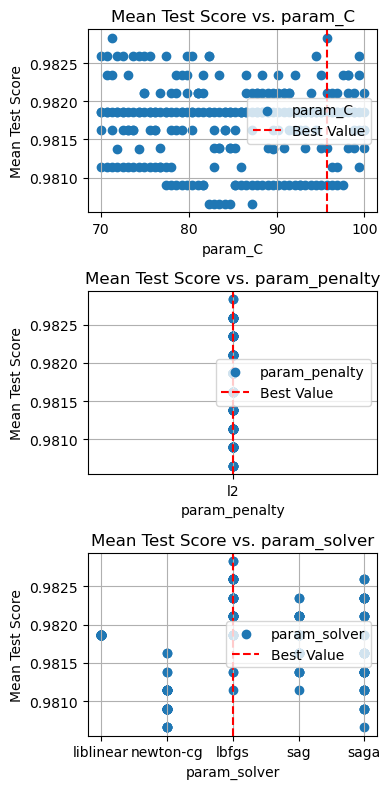

In [173]:
# Get the best hyperparameters for Logistic Regression
best_params_lr = lr_search.best_params_

# Train Logistic Regression with the best hyperparameters
lr_best = LogisticRegression(**best_params_lr)
lr_best.fit(X_train, y_train)

print("Best parameters for Logistic Regression:")
for param, value in best_params_lr.items():
    formatted_value = "{:.4f}".format(value) if isinstance(value, (int, float)) else value
    print(f"{param}: {formatted_value}")

# Convert cv_results_ to DataFrame
cv_results_df = pd.DataFrame(lr_search.cv_results_)

param_columns = [col for col in cv_results_df.columns if col.startswith("param_")]
mean_test_score = cv_results_df["mean_test_score"]

# Plot the data for each hyperparameter separately
fig, axes = plt.subplots(3, 1, figsize=(4, 8))

for i, param_col in enumerate(param_columns):
    row = i 
    col = 0
    
    ax = axes[i]
    # ax.plot(cv_results_df[param_col], mean_test_score, marker='o', label=param_col)
    ax.scatter(cv_results_df[param_col], mean_test_score, label=param_col)
    
    # Highlight the best value
    best_index = cv_results_df["mean_test_score"].idxmax()
    best_value = cv_results_df[param_col][best_index]
    ax.axvline(x=best_value, color='r', linestyle='--', label='Best Value')

    ax.set_xlabel(param_col)
    ax.set_ylabel("Mean Test Score")
    ax.set_title("Mean Test Score vs. " + param_col)
    ax.legend()
    ax.legend(loc='right', bbox_to_anchor=(1, 0.5))
    ax.grid(True)

plt.tight_layout()
plt.show()

# Evaluate

In [156]:
# Default Model:
basic_model_pred = basic_model.predict(X_test)

# # Calculate accuracy for the basic Logistic Regression model
basic_model_accuracy = accuracy_score(y_test, basic_model_pred)
print(f"Basic Logistic Regression Accuracy: {basic_model_accuracy:.4f}")

# Tuned Model:
best_model_pred = lr_best.predict(X_test)

# Calculate accuracy for the tuned Logistic Regression model
best_model_accuracy = accuracy_score(y_test, best_model_pred)
print(f"Tuned Logistic Regression Accuracy: {best_model_accuracy:.4f}")

# Show improvement
print("\nImprovement in accuracy:")
print(f"Logistic Regression: {best_model_accuracy - basic_model_accuracy:.4f}")



Basic Logistic Regression Accuracy: 0.9836
Tuned Logistic Regression Accuracy: 0.9894

Improvement in accuracy:
Logistic Regression: 0.0058
